In [117]:
import pandas as pd 
import numpy as np
import scipy.stats as ss

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set some styling defaults for matplotlib
plt.style.use("seaborn-talk")
mpl.rcParams["figure.dpi"] = 90  # change this to set apparent figure size
mpl.rcParams["figure.figsize"] = (7, 3)
mpl.rcParams["figure.frameon"] = False

# set decimal precision to 3 dec. places
%precision 3

ModuleNotFoundError: No module named 'pandas'

# II: Theory and practice

## Outcomes

You will understand:

* What a Bayesian is.
* The idea of a data generating process;
* The relation of models and parameters;
* What uncertainty is, where it comes from, and why it is important;
* The evolution of probabilistic programming languages;
* What probability is and how it represents uncertainty;
* The distinction between prediction and inference and the relation to forward and inverse probability.
* A high-speed review of basic probability theory through code: 
    * axioms of probability
    * mass functions, distributions, random variables
    * likelihood and sampling
    * joint, marginal, conditional, Bayes' rule
    * entropy, divergence
* Major classes of inference algorithms

----

## Poll

## What is a Bayesian [I]?

[TODO_FACETS_IMAGE]

A Bayesian is someone who:

* Is happy to live without truth;
* Reasons from belief to belief, guided by evidence;
* Thinks backwards by thinking forwards.

### Without truth
We might be used to computations that deal in absolute truths, but these aren't that useful for modelling. Very few processes are sufficiently stable and sufficiently well-understood that
they can be precisely modelled without uncertainty. Only being capable of dealing in absolute truths is exceedingly limiting; it breeds fragility and irrationality. 

### Belief to belief
A Bayesian computation does not result in a change of *state*, but a change of beliefs. This originates from some original beliefs and is then adjusted to be compatible with evidence that has been observed. This evidence typically concentrates belief on a tighter set of possible configurations. 

### Forwards, not back
Bayesian modelling involves first mode;ling *what we might observe given a hypothesis* and not *what hypothesis to choose given an observation*. This is a very important distinction, and makes it trivial to combine evidence from multiple sources.


# Models
Let's get back to computational interaction. A tenet of the approach is that it puts models *first*. Every model in computational interaction will be a bit of code that is executed in order to gain insight into an interaction phenomena that we cannot directly access. Not all things that are called models are equivalent, however. We need to think about the characteristics that of models of interaction: are some better than others?

## On the virtues of models
Given two models that model some interaction phenomena equally well, we'd prefer the model that:

* is easily implemented computationally and fits with software engineering practices;
* is conveniently parameterised, with *interpretable* parameters;
* is generative, and expressed in terms of generating synthetic observations;
* is capable of propagating uncertainty correctly.

## Data generating processes
 We need *models* to do *computational interaction*, and they need to be *executable*. We'd further like them to be *generative*. That implies code that simulates or emulates some part of an interactive system -- a **forward model** that transforms unknown states into the observable quantities they imply. At the heart of Bayesian modelling we have the idea of a **data generating process**, a process which we believe is generating data we observe. We implement this as an algorithm
which generates synthetic observations. 

> This is just a function!


Every application of Bayesian ideas starts with the data generating process: write down code that will spit out plausible simulations, given some configurable parameters.



### A very simple example
Let's model how tall someone is.

In [3]:
def how_tall_cm_1():
    return 180.0

In [4]:
how_tall_cm_1()

180.0

That isn't a very inspiring model, but it is a computational model that we can execute. A better model would be parametric (i.e. takes parameters).

### Parameters

These are just the things that we can vary to change the result (i.e. parameters we pass in to the function)

In [5]:
def how_tall_cm_2(gender):
    if gender=="male":
        return 175
    if gender=="female":
        return 162            

In [6]:
how_tall_cm_2("male")

175

Or multiple parameters:

In [22]:
def how_tall_cm_3(gender, age):
    if gender == "male":
        return 85 + min(age, 16) * 5.63
    if gender=="female":
        return 80 + min(age, 16) * 5.13

In [23]:
how_tall_cm_3("female", 24)

162.07999999999998


### Higher-level parameters

We can have higher-level parameters, where the model includes parameters that determine other parameters. Sometimes we will have a mixture of *observed* values and *latent* (hidden) parameters; but this poses no problem in modelling. 

We often write things like $$y = f(x;\theta)$$ to mean a function that produces simulated observations $y$, taking *observed* inputs $x$ and latent parameters $\theta$.

In [92]:
### Latent parameters
### Now the "magic constants" are passed in as parameters
def how_tall_cm_latent(gender, *, mean_height=160, m_f_difference=6.5):
    if gender=="male":
        return mean_height + m_f_difference
    if gender=="female":
        return mean_height - m_f_difference  
    

In [91]:
how_tall_cm_latent("male", m_f_difference=10.5)

170.500


## Uncertainty

>    All theorems are true.  
>    All models are wrong.  
>    And all data are inaccurate.  
>    What are we to do?  
>    We must be sure to remain uncertain. 

-- *[Leonard A. Smith, Proc. International School of Physics ``Enrico Fermi", (1997)](http://www2.maths.ox.ac.uk/~lenny/fermi96_main_abs.html)* 

### What is uncertainty and where does it come from?
Uncertainty exists in all systems that make contact with the real world. The physical world is not the domain of absolute logical truth, and the human social world is even less so. 

In interaction, we have, in the simplest case, two parties: 

* a brain, embedded in a human, embedded in a physical world
* and software, embedded in computer hardware, embedded in the same physical world. 

[IMAGE]

#### Epistemic, aleatoric and approximation

We can separate out some *types* of uncertainty:

* **Epistemic uncertainty** is uncertainty about what we know (hence epistemic) arising from the limitations of our knowledge (as encoded by a model). For example, we might model... [TODO]
* **Aleatoric uncertainty** is that which arises from (presumed) randomness in the world. If I toss a coin, my uncertainty about which side lands face up is aleatoric. This type of uncertainty cannot be resolved by better modelling, more data, etc.; it is irreducible. [TODO]
* **Approximation uncertainty** arises from the limitations of computation to approximate inference. In general, Bayesian methods cannot be applied exactly, and so the results are subject to additional uncertainty.

#### The wonder-goop
Uncertainty is what makes a model *statistical*, and it can be used to model real or apparent randomness in phenomena. But we often have to build simple, tractable models that we know are bad models of the real world -- they simply can't represent the true complexity of an interactive system. We can just add uncertainty as "goop" to soak up the variation between the truth and the model; we pretend that there is randomness to mask the misalignment. If done correctly, our inferences are still correct, and *represent* the degree to which they have misfit reality.



In [ ]:

def f(x):
    return x + np.cos(x) * 0.2 - 0.0001 * x ** 4

x = np.linspace(4, 16, 20)    
y = f(x)
p = np.polyfit(x, y, 1)
y_prime = np.polyval(p, x)
fig, ax = plt.subplots()
err = 2
for l in [0.25, 0.5, 1, 2]:
    ax.fill_between(x, y_prime-l*err, y_prime+l*err, color='C0', alpha=0.2)

ax.scatter(x, y, label='True', c='C1')
ax.plot(x, y_prime, label='Approximate')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")



### Stochastic results: sampling

The simple models above are purely deterministic. In interaction, it's rare to have a model that can precisely predict an outcome, even if the parameters are known: models aren't exact representations of reality [epistemic], and reality isn't predictable anyway [aleatoric].

A *statistical* data generating process would model the process with randomness, to reflect that we are drawing a (random) sample from a larger postulated population of possibilities. In practice, this just means we add random number generators to our function.

In [50]:
### Stochastic
def how_tall_cm_4(gender):
    if gender=="male":
        return np.random.normal(175, 10)
    if gender=="female":
        return np.random.normal(162, 7)

In [72]:
how_tall_cm_4("female")

165.142

In [73]:
how_tall_cm_4("female")

161.464

Text(0, 0.5, 'Count')

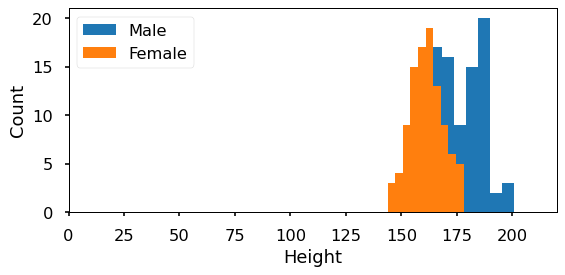

In [74]:
# show a a histogram
fig, ax = plt.subplots()
ax.hist([how_tall_cm_4("male") for i in range(100)], label="Male")
ax.hist([how_tall_cm_4("female") for i in range(100)], label="Female")
ax.legend()
ax.set_xlim(0, 220)
ax.set_xlabel("Height")
ax.set_ylabel("Count")

### Stochastic results: likelihood

To do Bayesian modelling, we will need one more thing in our data generating processes: a measure of how "likely" an observation is to have been generated by the simulation. We can see this as a measure of compatibility of a possible observation with the particular parameters of a model.
    
> Note that we can sometimes work around this requirement, using **approximate Bayesian computation (ABC)** -- but this tends to be quite inefficient. Still, the ABC approach, means we can use any model, without this likelihood function. 

This special feature will be the key to letting us *invert* our simulator, and work out how it is configured by feeding it possible data it might have generated.

For now, we'll assume we just get a number telling us how good a fit an observation is; the lower the number, the worse the fit.

In [28]:
### Likelihood: this is a function of data
### There's no randomness here!
def how_tall_cm_lik(gender, observed_height):    
    if gender=="male":
        return ss.norm(175, 10).logpdf(observed_height)
    if gender=="female":
        return ss.norm(162, 7).logpdf(observed_height)
    
print("male, 175cm tall", how_tall_cm_lik("male", 175))
print("female, 175cm tall", how_tall_cm_lik("female", 175))
print("male, 155cm tall", how_tall_cm_lik("male", 155))

male, 175cm tall -3.2215236261987186
female, 175cm tall -4.5893384781783535
male, 155cm tall -5.221523626198719


In [31]:
print("male 17.5cm tall", how_tall_cm_lik("male", 17.5))

male 17.5cm tall -127.25277362619872


Text(0, 0.5, 'Log-likelihood')

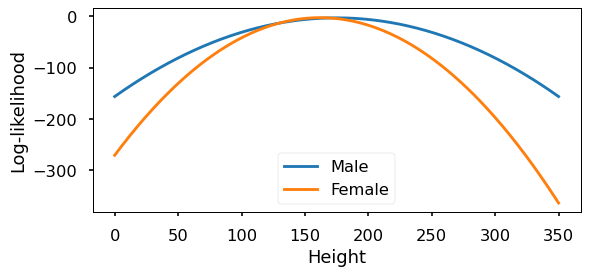

In [33]:
# show a plot of likelihood 
fig, ax = plt.subplots()
heights = np.linspace(0, 350, 350)
ax.plot(heights, [how_tall_cm_lik("male", h) for h in heights], label="Male")
ax.plot(heights, [how_tall_cm_lik("female", h) for h in heights], label="Female")

ax.legend()
ax.set_xlabel("Height")
ax.set_ylabel("Log-likelihood")

## Inversion

### A mysterious entity

<img src="imgs/entity.png">

The data generating process as a tame mysterious entity, who generates samples when simulating and can judge the quality of observations when fed them.  The mysterious entity is controlled by parameters (dials) which adjust the simulation and its opinion of the quality of observations. What we want is to know *which* mysterious entities are compatible with the true (but unseen) mysterious entity.

### Bayesian inversion

This is a problem of **inversion**; working out what was happening in the unobserved realm by deducing plausible behaviours compatible with the observations. Working out what age someone is given how tall they are is an inverse problem. Working out how tall they are given their age is a forward problem. In Bayesian modelling we use the **forward** model (the data generating process) as the key step to build our inversion model. 

[TODOINVERSIONIMAGE]

> Other approaches solve inversion directly; for example we might build a machine learning model that predicts ages given heights by fitting a deep network to lots of paired `(age, height)` examples. We could then, at inference time, feed it a height and it would return an age. Critically, it would only return *one* age -- the best predicted age (as directed by the objective function used to train the network). This is very much **not** what we will do in the Bayesian models we will see later!


### Computer science: inversion the advance of [scientific] programming languages

Advances in programming languages change the way we express models, and implicitly how we think about modelling the world. 

#### Traditional: Python, C, Java, Rust, C#, ...
We express models as operations on primitives, like numbers.

In [48]:
def f(x):
    return x ** 2 + x - 2 

#### Vectorised: NumPy, eigen, Julia, ...
We express models directly over numerical arrays ("tensors"). Code gets shorter, cleaner, and more efficient, takes advantage of hardware, etc.

In [49]:
import numpy as np
def f(x):
    return np.sum(x**2 + x - 2, axis=1)

### Differentiable: autograd, JAX, PyTorch, TensorFlow, ...
Defining a function over numerical arrays *automatically* also defines a function returning the partial derivatives. Universal first-order optimisation (gradient descent) becomes available.

* *Now we can write **inverse programs**: we define the output, and solve for the input*

In [64]:
import autograd.numpy as anp
import autograd


def f(x):
    return anp.sum((x**2 + x - 2) ** 2, axis=1)


df = autograd.elementwise_grad(f)

In [65]:
x = anp.eye(4)
print(f(x))
print(df(x))

[12. 12. 12. 12.]
[[ 0. -4. -4. -4.]
 [-4.  0. -4. -4.]
 [-4. -4.  0. -4.]
 [-4. -4. -4.  0.]]


In [66]:
# if only we had some way of repeating
# things on a computer
x = x - df(x) * 0.1
print(f(x))
x = x - df(x) * 0.1
print(f(x))
x = x - df(x) * 0.1
print(f(x))
x = x - df(x) * 0.1
print(f(x))
x = x - df(x) * 0.1
print(f(x))
x = x - df(x) * 0.1
print(f(x))
x = x - df(x) * 0.1
print(f(x))
x = x - df(x) * 0.1
print(f(x))

[6.221 6.221 6.221 6.221]
[0.17 0.17 0.17 0.17]
[0.08 0.08 0.08 0.08]
[0.06 0.06 0.06 0.06]
[0.033 0.033 0.033 0.033]
[0.023 0.023 0.023 0.023]
[0.013 0.013 0.013 0.013]
[0.009 0.009 0.009 0.009]


In [67]:
print(x)

[[1.    0.981 0.981 0.981]
 [0.981 1.    0.981 0.981]
 [0.981 0.981 1.    0.981]
 [0.981 0.981 0.981 1.   ]]



### Probabilistic (PPLs): Stan, PyMC, Turing.jl, BUGS/JAGS, ...
This adds distributions to programs. It automatically includes *random simulation*, *likelihood* and most importantly *inference*.

We don't need a PPL to do random simulation (a **stochastic model**):


In [29]:
# forward: random simulation
def f(x):
    x = np.array(x)
    y = np.random.normal(0, 1, x.shape)
    return x**2 + x - 2 + y


# different on every run
# models variation in the world
f([1, 2, 3])

array([-0.98366891,  4.51677363, 11.94491716])

or to do the inverse; compute the likelihood of (stochastic) observations under a parameterised model:

In [30]:
def llik_f(x, y):
    x = np.array(x)
    # return log-lik of observations y under model settings x
    return np.sum(ss.norm(x**2 + x - 2, 1).logpdf(y))


print(llik_f([1, 2, 3], f([1, 2, 3])))

-2.8013575129418946


but to do the **inference** part -- to work out the relative probability of possible inputs that might have generated an observation -- we'd be much better off using a real probabilistic programming language. This will implement efficient algorithm to allow us to write **uncertain inverse programs**.


## What is a Bayesian [II]?

A Bayesian:

* Represents, preserves and manipulates uncertainty about unknown states. Uncertainty is **first-class**.
* Builds generative models of the phenomena under consideration, that simulate plausible observations.
* Reasons about the unknown parameters that modulate the behaviour of those generative models.


# Probability


## Representations of uncertainty
We need to formalise the representation of uncertainty in our models. There are many possible ways to do this, but arguably only one good way: **probability**. Bayesians represent all uncertainty via probability, and describe the relative plausibility of states via **probability distributions**.

## What is probability?

A fraught philosophical question! See the references for debates on this topic. We'll make some uncontroversial statements, then an *interpretation* of probability. 

**Probability, as we shall use it, is simply an extension of ordinary logic to uncertain situations.**


### Basic facts

* A probability distribution associates a set of distinct *outcomes* to probabilities. $P(X=x)$ meaning the probability that variable $X$ takes on outcome $x$.

In [12]:
# outcome : probability
coin_toss = {"heads": 0.5, "tails":0.5} 
robot_direction = {"fwd":0.6, "left":0.1, "right":0.0, "back":0.3}
dice_throw = {1:1/6, 2:1/6, 3:1/6, 4:1/6, 5:1/6, 6:1/6}
user_emotion = {"happy":0.1, "sad":0.2, "excited":0.05, "angry":0.1, 
                "confused":0.5, "crazed":0.05, "jubilant":0.05}

* Probabilities are non-negative and cannot exceed 1: $0 \leq P(A) \leq 1$ 
* The probability of all possible outcomes in a distribution sums to 1 exactly.

In [13]:
def proper(dist):
    ps = dist.values()
    assert all(0<=p<=1 for p in ps), "Probability is not in [0,1]"
    assert sum(ps) == 1.0, "Distribution does not sum to 1"
    return True

proper(coin_toss) # fine
proper(robot_direction) # fine

True

In [14]:
proper({"fwd":0.6, "left":0.1, "right":0.0, "back":0.5})

AssertionError: Distribution does not sum to 1

* We deal with sets of possible outcomes; the set of all outcomes in our "model" is the *sample space*.

In [15]:
def sample_space(dist):
    return list(dist.keys())

sample_space(robot_direction)

['fwd', 'left', 'right', 'back']

* An *event* is any set of outcomes. 
* => If A and B are events $P(A \lor B) = P(A) + P(B) - P(A\land B)$ (sum rule; A and B are sets of outcomes)

In [16]:
def p_of(event, dist):
    return sum(p for outcome, p in dist.items() if outcome in event)

p_of({"fwd", "back"}, robot_direction)

0.8999999999999999

In [17]:
p_of({"happy", "sad", "crazy"}, user_emotion)

0.30000000000000004

* The probability of any set of disjoint events that cover all outcomes is therefore also 1.

* => If A has probability $P(A)=P(X \in A)$, $P(¬A)=P(X \notin A)=1-P(A)$

In [18]:
def sum_rule(a, b, dist):
    p_a = p_of(a, dist)
    p_b = p_of(b, dist)
    p_ab = p_of(a.intersection(b), dist)
    return p_a + p_b - p_ab

sum_rule({"right", "back"}, {"back", "left"}, robot_direction)

0.39999999999999997

In [19]:
p_of({"right", "back", "left"}, robot_direction) # just the same

0.4

* The probability of two *independent* events A and B is $P(A \land B) = P(A)P(B)$

In [20]:
def product_rule(a, b, dist_a, dist_b):
    return p_of(a, dist_a) * p_of(b, dist_b)

# what's the probability we go forward and we toss a coin that is heads?
product_rule({"fwd"}, {"heads"}, robot_direction, coin_toss)

0.3

* The probability of A *given we know that* an event B is true is written $P(A|B) = P(A \land B)/P(B)$

In [21]:
def conditional(a, b, dist_ab):
    p = 0
    for o_a, o_b in dist_ab.items():
        if o_b == b:
            p += o_a

* The probability of P(A|B) is **not** in general P(B|A).
* $P(A|B) = P(B|A)P(A) / P(B)$ (Bayes' Rule)
* $P(B) = \sum_B P(B|A)P(A)$ 

---

### Worked example

I grab a single coin from my pocket. We assume they are all Euro coins. That's our space of possibilities.

* The probability of the coin being worth >50c is an *event*; perhaps $P(v>0.5)=P(v \in {1.0, 2.0})=0.33$
* Regardless of what distribution of coins I have in my pocket, it cannot be less than impossible to pick a specific coin, nor more than certain.
* A probability distribution might map each coin (outcome) to a probability, a real number in [0,1]; for example:
    * [REPLACEWITHIMAGE]
    * P(v=0.01) = 0.02
    * P(v=0.02) = 0.05
    * P(v=0.05) = 0.1
    * P(v=0.10) = 0.1
    * P(v=0.20) = 0.2
    * P(v=0.50) = 0.2
    * P(v=1.00) = 0.3
    * P(v=2.00) = 0.03
    

In [22]:
coins = {0.01: 0.02,
         0.02 : 0.05,
         0.05 : 0.1,
         0.1 : 0.1,
         0.2 : 0.2, 
         0.5 : 0.2,
         1.0 : 0.3,
         2.0 : 0.03}

proper(coins)

True

* A coin might be worth less than 10 cents $P(v<0.1) = P(v \in \{0.01, 0.02, 0.05\})$ or being gold-coloured $P(v \in \{0.1, 0.2, 0.5\})$, or being 1 euro $P(v \in \{1.0\})$. These are all events.

In [23]:
possible_coins = sample_space(coins)
gold = {0.1, 0.2, 0.5}

print("P(C<0.1)", p_of([coin for coin in possible_coins if coin<0.1], coins))
print("P(C gold)", p_of(gold, coins))
print("P(C=1.0)", p_of({1.0}, coins))

P(C<0.1) 0.17
P(C gold) 0.5
P(C=1.0) 0.3


* Since we must draw exactly one coin, the event that includes all coins must have probability 1.0.

In [24]:
p_of(possible_coins, coins)

1.0

* The probability of a coin being less than 20c or more than *or* equal to 20c must also be 1.0, by the same logic (we cover every outcome exactly once). $P(v < 0.2 \lor v\geq 0.2) = P(v<0.2) + P(v \geq 0.2) = 1.0$

In [25]:
k = 0.2
(p_of([coin for coin in possible_coins if coin<k], coins) + p_of([coin for coin in possible_coins if coin>=k], coins))

1.0

* The probability of a coin being not gold coloured in one minus the probability of being gold coloured $P(gold) + P(¬gold) = 1$, $P(¬gold) = 1 - P(gold)$

In [26]:
not_gold = set(coins) - set(gold)
p_of(gold, coins) + p_of(not_gold, coins) # every possibility counted once

1.0

* The probability of a coin being less than 50c or being gold-coloured is $P(v < 0.5 \lor v \in \{0.2, 0.5\}) = P(v<0.5) + P(v \in \{0.2, 0.5\}) - P(v<0.5 \land v \in \{0.2, 0.5\}) = P(v<0.5) + P(v \in \{0.2, 0.5\}) - P(v=0.5)$ -- we compensate for "double counting" the overlap

In [27]:
p_gold_or_50 = (p_of(gold, coins) 
                + p_of([coin for coin in coins if coin<0.5], coins) 
                - p_of([coin for coin in coins if coin<0.5 and coin in gold], coins))

print(p_gold_or_50)

0.6699999999999999


In [28]:
gold_or_50 = set(gold) | set([coin for coin in coins if coin<0.5])
print(p_of(gold_or_50, coins))

0.67


* The probability that I draw a coin that is gold coloured and it is a Spanish coin is $P(gold \land Spanish) = P(gold)P(Spanish)$, assuming these are independent (e.g. I don't specially collect gold-coloured Spanish euro coins)


In [29]:
coin_countries = {"Spanish":0.1, "French":0.1, "German":0.4, "Finnish":0.1, 
                 "Danish":0.0, "Irish":0.1, "Italian":0.1, 
                 "Czech":0.05, "Austrian":0.05}

In [30]:
product_rule(gold, {"Spanish"}, coins, coin_countries)

0.05


> * But the probability that I draw coin that is copper coloured and Finnish is **not** $P(copper)P(Finnish)$ (because 1c and 2c Finnish coins are very rare)



* The probability that I draw a gold coin given that the coin is less than a euro is $P(gold | v<1.0) = P(v \in \{0.1, 0.2, 0.5\}) / P(v \in \{0.01, 0.02, 0.05, 0.1, 0.2, 0.5\}) \approx 0.746...$


In [172]:
less_100 = {coin for coin in coins if coin<1.00}
p_of(gold, coins) / p_of(less_100, coins)

0.746


* **But note!** the probability that I draw a coin less than a euro given that it is gold is $P(v < 1.0 | gold) = P(v \in \{0.1, 0.2, 0.5\}) / P(v \in \{0.1, 0.2, 0.5\}) = 1.0$

In [173]:
p_of(gold, coins) / p_of(less_100.intersection(gold), coins)

1.000


## Random variables and distributions

We'll use the following definitions of terms:

* A **random variable** $X$ is a variable whose value is not known, but whose possible values *are* known, and how likely those values are is also known. Probability theory allows us to manipulate random variables without having to assign them a specific value.
* A **probability distribution** $P(X=x)$ associates a random variables outcomes to probabilities. It encodes the plausibility of a variable's outcomes.
* A **probability mass function** $f_X(x)$ is a function that yields probabilities as a function of outcomes. This is just the dictionaries `{outcome: p}` we've already used.
* If we have uncountable outcomes (like real numbers), we instead use a **probability density function** $f_X(x)$, which just guarantees the rules above hold for dense subsets of the outcomes, even if they can't hold for individual outcomes.
    * Densities are not probabilities! They are non-negative, but can be greater than 1; the *integral* of a density over some domain *is* a probability. (e.g. $P(1\leq age \leq 2) = \int_1^2 f_X(age) dx$ over the interval [1, 2] of $\mathbb{R}$) 

A random variable could represent:


[IMAGEHERE]

* whether or not a user is paying attention (discrete: binary), over the set of outcomes $\{\text{attending}, \text{ignoring}\}$; 
* the page of a document a user is reading $\{1,2,3,\dots\}$ (discrete); 
* the length of a user's arm (continuous), over the set of outcomes $\real$; 
* the gaze angle of a user's pupil with respect to a screen (continuous, multi-dimensional), over the set of outcomes $\real^2$. 

## Distributions
A **probability distribution** defines how likely different states of a random variable are. 

We can see $X$ as the the *experiment* and $x$ as the *outcome*, with a function mapping every possible outcome to a probability. 

> Be careful: these are *notional* experiments, not real ones. They might involve things that are in the past, or have no randomness. They are subjective experiments from the perspective of an agent. 

$$
P(A),\  \text{the probability of an event A}, \text{equivalent to} P(X \in A)\\
P(X=x),\  \text{the probability of random variable X taking on value x}\\
P(X),\  \text{shorthand for distribution of X }\\
$$

In [185]:
# be careful!

p_of({1, 2}, {1:0.5, 2:0.2, 3:0.1, 4:0.1}) # P(A), a number (from a set of outcomes)
p_of({1}, {1:0.5, 2:0.2, 3:0.1, 4:0.1})    # P(X=x), a number from an outcome
{1:0.5, 2:0.2, 3:0.1, 4:0.1}               # P(X), a distribution

{1: 0.500, 2: 0.200, 3: 0.100, 4: 0.100}

## Philosophy

We will use the subjective Bayesian interpretation of probability. This has a simple statement but deep implications.

* Probability is a *degree of belief*.
* We express how strongly we believe something to be true with a probability. 
* We encode all beliefs as probability distributions. It's probabilities all the way down.
* We manipulate all beliefs via the rules above. This naturally includes all of classical logic, where P=0 is False and P=1 is True.
* We might expect that these probabilities would be *consistent* with observed relative frequencies of some random repeated process, but **that's not our definition of probability**. We do not invoke the mystical infinitely repeated identical experiments!
* It's completely fine to make statements like "the probability that it is raining right now", "the probability that 2^10^10^10-1 is prime" or "the probability that the 2012 Olympics was in London" (think carefully about what the probability might be!)
* Because this form of probability theory is merely a logic of uncertain beliefs, we must always reason from some starting point. Rather than **axioms**, as in classical logic, we instead begin from **priors**, associating beliefs to probabilities at the start of a reasoning process.

> We shall move from "what proportion of times will I draw a 50c coin from my pocket?" to "what do you *believe* about my having a 50c coin?"

### Random parameters
* We will associate probability distributions with the *parameters* of our data generating processes!
    * After all, we want to encode beliefs about what parameters could be reasonable.
* These distributions capture our *epistemic* uncertainty; they in turn may drive generation of random observations which have *aleatoric* uncertainty.
* This means that we will have distributions over processes, who in turn (usually) have distributions over possible observations.
* When we talk about Bayesian inference, we are talking about updating probability distributions over these parameters, given definite observations.

> In the age/height example at the top of the notebook, we'd put a distribution on the age *and* a distribution on the generated height. We'd then try and do inference, given a set of real, observed heights, to narrow down the likely ages.

### Computer science

* Probability is a **universal language** for expressing uncertain states.
* Anything that "speaks probability" can be plugged into any other component that also does so.
    * (at least if we can map sample spaces onto each other)
* Probability is easy to encode in data structures for finite, discrete problems and the algorithms are simple
    * A hash table/dictionary or plain array can do most of the work.
* It is harder in continuous, multi-dimensional spaces or those with exotic topology.
    * Consequently, we will virtually always have to **approximate** probabilities in these situations.
    * And we will have to build and use approximation algorithms to do the hard work.

## Probability mass functions and probability density functions

We won't worry about the distinction too much in this brief intro. The main points are:

* A PDF maps outcomes to *densities*. These are not probabilities. They can be >1 (but must be positive).
* We can ask the probability that an outcome "lands" in any dense subset of a PDF (e.g. a contiguous range). This *is* a probability*.
* It's often necessary to work with parametric functions for PDFs -- we end up manipulating the parameters computationally.
    * For example, a normal density has two parameters, $\mu$ and $\sigma^2$. From this we can evaluate a PDF function.
* It's often easier to think of the *cumulative distribution function*, the probability that an outcome lies below some threshold $x$.
    * This *is* a probability, and runs from 0 to 1 across the real numbers.

Text(0, 0.5, '$f_X$(height)')

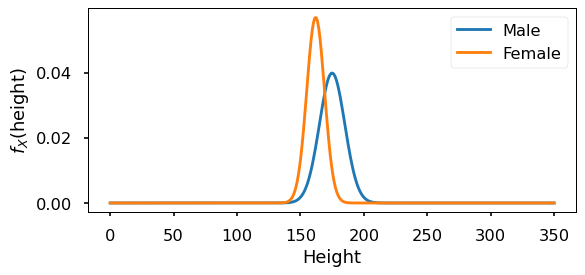

In [175]:
# show a PDF plot
fig, ax = plt.subplots()

def how_tall_cm_pdf(gender, observed_height):    
    if gender=="male":
        return ss.norm(175, 10).pdf(observed_height)
    if gender=="female":
        return ss.norm(162, 7).pdf(observed_height)
    
heights = np.linspace(0, 350, 350)
ax.plot(heights, [how_tall_cm_pdf("male", h) for h in heights], label="Male")
ax.plot(heights, [how_tall_cm_pdf("female", h) for h in heights], label="Female")

ax.legend()
ax.set_xlabel("Height")
ax.set_ylabel("$f_X$(height)")

Text(0, 0.5, 'P(X<height)')

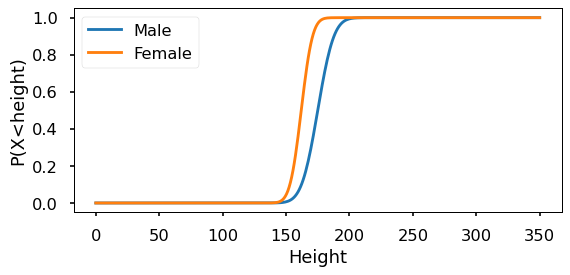

In [176]:
# show a CDF plot
fig, ax = plt.subplots()

def how_tall_cm_cdf(gender, observed_height):    
    if gender=="male":
        return ss.norm(175, 10).cdf(observed_height)
    if gender=="female":
        return ss.norm(162, 7).cdf(observed_height)
    
heights = np.linspace(0, 350, 350)
ax.plot(heights, [how_tall_cm_cdf("male", h) for h in heights], label="Male")
ax.plot(heights, [how_tall_cm_cdf("female", h) for h in heights], label="Female")

ax.legend()
ax.set_xlabel("Height")
ax.set_ylabel("P(X<height)")

### Inference

We seek a logical process to perform inference: the deduction of the hidden from the seen. We seek to do so under uncertainty, where we do not deal in absolutes of truth and falsity.

* Our primary tool is Bayes Rule. 
* The ability to do inference is derived from the ability to say: how likely is some unseen X given we saw Y?
    * "How likely is it that a coin is more than five years old given it is heavily corroded?"
        * I can see corrosion; I can't see age.
    * We can answer that as:
        * It is the probability that we'd observe Y if X were true; multiplied by how likely we *already* believe X to be true; and normalised so that the probability for each possible X sums up to 1.
        * $P(X|Y) = P(Y|X)P(X) / P(Y) = P(Y|X)P(X) / \sum_X P(Y|X)P(X)$
        * $P(X|Y) \propto P(Y|X)P(X)$ if all we care about is how *relatively* likely each possible $X$ is (not how *absolutely* likely it is)
    * These parts have names:
        * `posterior = likelihood * prior / evidence`
        * **posterior** The probability of beliefs about $X$ after having observed $Y$
        * **likelihood** How likely $Y$ is to be observed under any possible hypothesised $X$
        * **prior** How currently likely $X$ is before observing $Y$
        * **evidence** How likely $Y$ is to be observed regardless of what hypothesis we make about $X$

* The likelihood of X, written $L(X)$ is how likely $X$ is to be observed under a particular model. Often written $L(X|\theta)$ to mean "the likelihood of X under some specific parameters \theta".
    * Probabilities speak of the "future", of the relative propensity for unobserved outcomes to occur.
    * Likelihoods speak of the "past", of observed states. They are just a function of observations/data, and they tell us how likely observed outcomes are under some assumption.
    * The likelihood is $L(x) = f_X(x)$, just the mass/density evaluated for a specific outcome.

## Forward and inverse probability

* Questions of **forward probability** are likely to be familiar to you; they are the backbone of frequentist statistics, and they ask questions about the future outcomes given a probability distribution:
    * "What is the probability of drawing three 20c coins in a row" -> $P(X|\theta)$ -> FORWARD
* Questions of **inverse probability** require Bayesian inference, and they ask questions about the probability of the causes of outcomes already observed:
    * "What is the probability I only have gold coins, if I draw three 20c coins in a row" -> -> $P(\theta|X)$ INVERSE

In general, we want to do the inverse probability calculations not for one specific question (as above), but instead for an *entire* probability distribution:
    * "What is the distribution over coin classes, given I draw three 20c coins in a row".

Note the difference between frequentist and Bayesian interpretations here:

* Frequentist statistics asks questions about infinite repeated trials, where we assume random outcomes but fixed (unknown) parameters.
* Bayesian statistics asks questions about random parameters, given fixed observations.

## What is a Bayesian? [III]

A **Bayesian**:

* Represents belief exclusively using probability distributions and conducts all computation about beliefs via the logic of probability.
* Reasons from hypotheses about the world to the evidence that those hypotheses would generate (via a data generating process).
* Updates belief using Bayes' Rule, combining a prior belief with observed evidence to deduce new beliefs.
* Infers conditional distributions -- posterior distributions -- over unseen parameters of the DGP.

Given a parameterised simulator that approximates the problem we are interested in, and some idea about what values these parameters could take on (expressed as a prior probability distribution) we can then use evidence to make a Bayesian update to concentrate a belief distribution on more likely parameter configurations --- a posterior probability distribution.

## Likelihood


In [ ]:
def likelihood(outcome, pmf):
    return pmf[outcome]

def loglik(outcomes, pmf):
    return sum(np.log(outcome) for outcome in outcomes)

## Sampling

In [113]:
def sample(pmf, n=1):
    return np.random.choice(list(pmf.keys()), p=list(pmf.values()), size=n)

## Empirical distribution

In [140]:
from collections import Counter

def from_empirical(observations):
    c = Counter(observations)
    total = sum(c.values())
    return {outcome: count / total for outcome, count in c.items()}

## Expectation

In [141]:
def expect(pmf, g=lambda x: x):
    return sum(g(outcome) * p for outcome, p in pmf.items())

## Approximate expectation

$$ E[g(X)] \approx \frac{1}{N} \sum_{i=1}^{N} g(x) $$

In [186]:
def expect_approx(sample_fn, n, g=lambda x: x):
    return sum(g(sample_fn()) for i in range(n))



## Entropy


In [142]:
def entropy(pmf):
    return -sum(p * np.log2(p) for p in pmf.values())

## Bayes Rule

In [87]:
def bayes(pmf, likelihood):
    assert list(pmf.keys()) == list(likelihood.keys())
    unnorm = {k: pmf[k] * likelihood[k] for k in pmf}
    s = sum(unnorm.values())
    return {k:unnorm[k] / s for k in unnorm}

In [150]:

def bayes_table(pmf, likelihood):
    unnorm = {k: pmf[k] * likelihood[k] for k in pmf}
    s = sum(unnorm.values())  
    posterior =  {k:unnorm[k] / s for k in unnorm}
    df = pd.DataFrame(zip(pmf.values(), likelihood.values(), unnorm.values(), posterior.values()), columns = ["Prior", "Likelihood", "Unnormalised", "Posterior"])
    return df 


In [151]:
prior = {1:0.5, 2:0.5}
likelihood = from_empirical([1,2,2])
bayes_table(prior, likelihood)


,Prior,Likelihood,Unnormalised,Posterior
0,0.5,0.333333,0.166667,0.333333
1,0.5,0.666667,0.333333,0.666667


## Joint


In [152]:
def joint(self, other):
    """Only valid for two *independent* PMFs!"""
    return (
        {
            (a, b): p_a * p_b
            for (a, p_a), (b, p_b) in itertools.product(
                pmf.items(), pmf.items()
            )
        }
    )


joint({1: 0.2, 2: 0.8}, {"cat": 0.1, "dog": 0.9})


NameError: name 'itertools' is not defined

## Marginal

In [153]:
## Conditional
def condition(pmf, condition):
    acc = {}
    for outcome, p in pmf.items():
        cond_outcome = tuple(
            comp if cond is None else cond for cond, comp in zip(condition, outcome)
        )
        if cond_outcome == outcome:
            acc[cond_outcome] = acc.get(cond_outcome, 0) + pmf[outcome]
    total = sum(acc.values())
    return {outcome: p / total for outcome, p in acc.items()}

In [ ]:
## Conditional "distribution" P(X|Y)

def none_product(prods, p=()):
    if len(prods) == 0:
        return p
    first = prods[0]
    if first is None:
        return none_product(prods[1:], p + (None,))
    else:
        return [none_product(prods[1:], p + (elt,)) for elt in first]


def conditions(self, conditions):
    return [self.condition(c) for c in none_product(conditions)]


In [7]:
   
    
class Grid:
    def __init__(self, start, stop, steps, fn=None):
        self.grid = np.linspace(start, stop, steps)
        if fn is None:
            self.uniform()
        else:
            self.from_fn(fn)
            
    
    @classmethod
    def from_fn(cls, start, stop, steps, fn):
        g = Grid(start, stop, steps, fn)
        return g
            
    def from_fn(self, fn):
        self.p = fn(self.grid)
        self.p = self.p / sum(self.p) # ensure normalised        
        
    def __getitem__(self, item):
        
            
        
sum(Grid(-10, 10, 25).p)


1.0000000000000002

# Example

Let's look a simple example: capturing and reporting user ratings for a component.

> 86% of users liked this.

### Assumptions
We have a UI that shows how many people liked or disliked a product. Individual users provide ratings by clicking either 👍 or 👎. 

We assume a population of users, and we want to know how "good" that population (as a single entity) thinks that product is; the "hive mind". 

### Data generating process
* Step 1: describe the data generating process.

We'll assume this simple model: the hive mind has a value $q$ between 0 and 1 that it ascribes to every product. Individual users, as drones of the hive mind, randomly produce likes or dislikes *in proportion* to this value. 

#### Observations
A variable length sequence of 👍 or 👎.

#### Code
* Step 2: write down the simulator that generates samples, and a likelihood function that tells us how likely they are.

We can now define a simulator in code:

In [192]:
# q -> epistemic uncertainty
# we assume that n is independent 
# (but we don't have to)
def product_sample(q, n):
    # likes -> aleatoric uncertainty
    likes = np.random.choice(["👍","👎"], size=n, p=[q, 1-q])
    return "".join(likes)

product_sample(0.25, 10)    

'👎👎👎👎👎👍👎👎👎👍'

We also need a likelihood function. In this case, it's easy: we have probability `q` of seeing a "👍" and a probability of `1-q` of seeing a 👍. We can also return the sum of log-likelihoods for a string (sum of logs = product of values):

In [102]:
def lik(q, o):
        return q if o=='👍' else 1-q
    
# return the log-likelihood of a string 
# under some specific setting of q    
def product_llik(q, obs):    
    return sum(np.log(lik(q, o)) for o in obs)
    

### Bayesian estimation
* Step 3: collect, process and clean data (omitted for clarity!)
* Step 4: perform inference

What is inference in this case? We want to perform deduction -- invert the simulator so that we can work out `q` by observing sequences of characters. 

**We are Bayesian.** Therefore, we don't want a value for `q`, we want a *distribution* for `q`. 

> Distributions, not points!

This implies:
* We need to have a way of representing a distribution over `q` -- what data structure will we choose? (and what algorithm will that require?)
* We need to start somewhere -- what prior for `q` will we believe *before we observe any product like data*?

We'll use the simple grid model as our data structure, and evenly divide the interval [0, 1] into N discrete bins. I'll choose to set N=20 (but this is a fairly arbitrary choice).


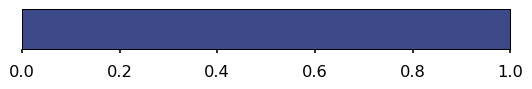

In [103]:
possible_q = np.linspace(0, 1, 20)
p = np.ones_like(possible_q) / len(possible_q)
q_pmf = {q:p for q, p in zip(possible_q, p)}

def show_grid(pmf):
    xs = np.array(list(pmf.keys()))
    cs = np.sqrt(np.array(list(pmf.values())))
    ys = np.ones_like(xs)
    fig, ax = plt.subplots()
    plt.imshow(np.tile(cs[None, :], (8, 1)), cmap='viridis', vmin=0, vmax=1, 
               extent=[np.min(xs),np.max(xs), 0,(np.max(xs)-np.min(xs))/12])
    ax.set_yticks([])
            
show_grid(q_pmf)

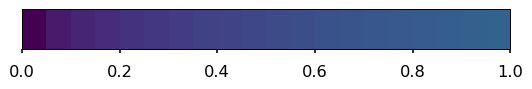

In [104]:
update = {q:lik(q, '👍') for q in q_pmf}
next_pmf = bayes(q_pmf, update)
show_grid(next_pmf)

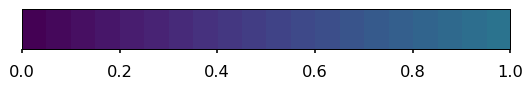

In [105]:
update = {q:lik(q, '👍') for q in q_pmf}
next_pmf = bayes(next_pmf, update)
show_grid(next_pmf)

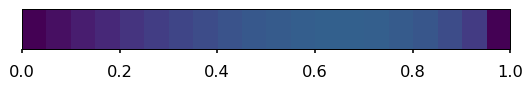

In [106]:
update = {q:lik(q, '👎') for q in q_pmf}
next_pmf = bayes(next_pmf, update)
show_grid(next_pmf)

C:\Users\John\AppData\Local\Temp/ipykernel_100732/12110543.py:7: RuntimeWarning: divide by zero encountered in log
  return sum(np.log(lik(q, o)) for o in obs)


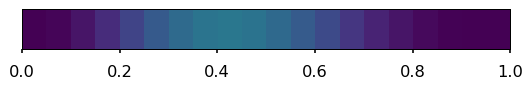

In [108]:
update = {q:np.exp(product_llik(q, '👎👎👎👍👍👎👍👎👍👎👍👎')) for q in q_pmf}
next_pmf = bayes(q_pmf, update)
show_grid(next_pmf)


### Reporting results
We can report our results in various ways. For each product, we have a PMF. We could show this as Box plots, violin plots, gradient strips. What we should *not* do is just show the mean (or max or min)!

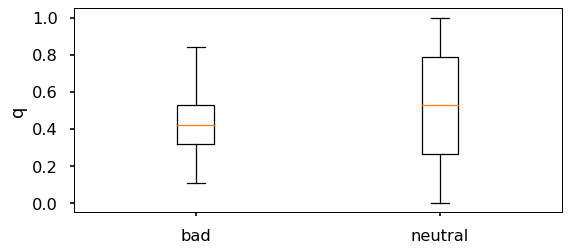

In [116]:
def to_samples(products, n=5000):
    return {product:sample(pmf, n) for product, pmf in products.items()}

def show_products_box(products):
    fig, ax = plt.subplots()
    samps = to_samples(products)
    ax.boxplot(samps.values(), labels=samps.keys())
    ax.set_ylabel("q")

def show_products_violin(products):
    fig, ax = plt.subplots()
    samps = to_samples(products)
    ax.boxplot(samps.values(), labels=samps.keys())
    ax.set_ylabel("q")
        
    
show_products_box({"bad":next_pmf, "neutral":q_pmf})

### Expectation

### Probabilistic filtering and sequential ("recursive") updates

The names *prior* and *posterior* can refer to distinct parts of a modelling process (e.g. I elicit a prior from an expert, then run an experiment to observe data that I use to compute a posterior). But the naming of prior and posterior is *purely relative*! 

It's completely fine for a prior for one step of an inference process to become the posterior for another step. Everything is just probability distributions, which are a universal language -- everything plugs together (over the same sample space, anyway).

![Recursive updates](imgs/recursive.png)


### Sensor fusion

### Bayesian optimisation

## Shadow worlds

[SHADOW_WORLD_IMAGE]

### (Prior, posterior) x (parameter, predictive)

It's important to keep the various elements of a Bayesian model distinct.

#### Over parameters (inference)
* **Prior** a distribution over unknown parameters before some observations
* **Posterior** a distribution over unknown parameters after observations

#### Over observations (simulation)
* **Prior predictive** a distribution over observations *that our model would generate* under the priors.
* **Posterior predictive** a distribution over observations *that our model would generate* under the posterior.


In [200]:
### example


## Inference approaches

### The process of eliciting, encoding and validating
What does it look like to *do* Bayesian modelling? We need to do several things:

* Elicit models (data generating processes) that we believe are good fits to the phenomena;
* Encode our beliefs about plausible configurations of those models mathematically, as prior distributions on parameters.
* Infer posterior distributions over those parameters using an inference algorithm.
* Validate that our modelling assumptions held true.

#### Elicit and encode

#### Validate


### Concrete algorithms for inference
In general, we wouldn't use the grid type models we have seen for real problems.

* **Q: Why not?**

Practical algorithms for problems that involve continuous variables fall into three basic types. We'll see each type applied to a very simple problem. 

#### Exact
Very occasionally, we can compute the exact density function for a posterior distribution by some algebraic trickery. This is only possible if our prior and likelihood have a very specific form. 

##### Data structure
* Parameter vectors (associated with density functions)

##### Algorithm

Direct computation.

* We have a **parametric** form for our prior density $f(\theta)$ (e.g. a normal distribution with parameters $\mu$ and $\sigma^2$).
* We have a collection of observations
* We have a **parametric** likelihood that is compatible with our prior density function; $L(x|\phi)$
* We run an algorithm that computes a **parametric** density function for the posterior $g(\psi)$.

$f$, $L$ and $g$ don't have to have the same form (e.g. they might not all be normal), but they do have to be compatible ("conjugate priors"). 


#### Pros and cons

* Advantages: Extremely efficient; no approximation error.
* Disadvantages: constrains you to a small range of modelling choices; requires special implementation for each case; can be complicated to understand.

#### MCMC

##### Data structure
* Samples (i.e. sequences of values in the sample space *of parameters*)

##### Algorithm

Stochastic process.

#### Pros and cons
* Advantages: extremely general ("one button inference"); samples are easy to work with (just arrays of definite numbers); lots of sophisticated algorithms
* Disadvantages: may not converge; lots of tuning and tweaking to get sampling to work; some problems are very resistant to sampling based solutions (e.g. exotic geometry, partially discrete problems)

#### Variational

##### Data structure
* Samples (i.e. sequences of values in the sample space *of parameters*)

##### Algorithm

Optimisation.

## What is a Bayesian [IV]

* Applies algorithms such as MCMC or variational inference to infer probability distributions over hidden states from observed data.
* Implements data generating processes as computational simulators of expected phenomena, and can simulate concrete implications of hypotheses.
* Reports and summarises inferences via approximations that are computationally tractable (e.g. via random samples)
* Is typically concerned with *expectations* of a score function applied to a distribution, such as utility.
* Freely fuses evidence from any source, in the past, present or future.



### Why is this Computational HCI?

* We build **statistical models** of user behaviour, and estimate parameters of that model from quantitative observations of data. 
* This is a **model-led approach** which has a strong mathematical underpinning and many powerful algorithms which can be brought to bear.
* This is **robust** (it appropriately represents uncertainty) and **generative** (it can simulate behaviour compatible with observations).  